# Importaciones Iniciales

In [6]:
import xgboost as xgb
import pandas as pd
from tqdm import tqdm
import pickle
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import os

In [46]:
import sys
!{sys.executable} -m pip install xgboost
!{sys.executable} -m pip install shap

# Mineria de datos: Condiciones climáticas

In [2]:
import sys
!{sys.executable} -m pip install wwo-hist

In [3]:
import wwo_hist

In [4]:
key='c1e2658f6a64477e8b7232824220912' # API key obtained from https://www.worldweatheronline.com/
locations=['bogota'] # list of strings containg US Zipcode, UK Postcode, Canada Postalcode, IP address, Latitude/Longitude (decimal degree) or city name  
start='01-01-2021' # date when desired scraping period starts; preferred date format: 'dd-mmm-yyyy'
end='31-12-2021' # date when desired scraping period ends; preferred date format: 'dd-mmm-yyyy
freq=24 # frequency between observations; possible values 1 (1 hour), 3 (3 hours), 6 (6 hours), 12 (12 hours (day/night)) or 24 (daily averages)


In [ ]:
hist_weather_data = wwo_hist.retrieve_hist_data(
    api_key=key, 
    location_list=locations, 
    start_date=start, 
    end_date=end, 
    frequency=freq, 
    location_label=False, 
    export_csv=True, 
    store_df=False
)



# XGBoost

In [7]:
os.chdir('C:\\Users\\mrozo\\OneDrive - Universidad de los Andes\\Maestría\\Big Data\\final')

In [99]:
x_train=pd.read_csv(r"base_final_proyecto (trainx).csv")

y_train=pd.read_csv(r"base_final_proyecto (trainy).csv")

In [88]:
x_train

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,sunrise,sunset,DewPointC,FeelsLikeC,...,semanas_mes5,semanas_mes6,mes2,mes3,mes4,mes5,mes6,mes7,mes8,mes9
0,20.000000,11.000000,0,8.800000,4.0,0.000000,371.000000,1089.000000,11.0,15.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,17.000000,12.000000,0,7.400000,3.0,8.000000,362.000000,1088.000000,12.0,14.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,17.000000,12.000000,0,7.400000,3.0,8.000000,362.000000,1088.000000,12.0,14.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,22.000000,10.000000,0,10.200000,4.0,38.000000,370.000000,1084.000000,9.0,15.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,22.000000,10.000000,0,10.200000,4.0,38.000000,370.000000,1084.000000,9.0,15.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61243,18.533075,9.933850,0,8.986770,4.0,12.136176,350.867700,1084.136176,10.0,13.466925,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.466925,0.533075
61244,18.562712,9.874577,0,8.974915,4.0,11.810171,350.749153,1083.810171,10.0,13.437288,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.437288,0.562712
61245,18.928194,9.143611,0,8.828722,4.0,7.789862,349.287222,1079.789862,10.0,13.071806,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071806,0.928194
61246,18.999277,9.001446,0,8.800289,4.0,7.007953,349.002892,1079.007953,10.0,13.000723,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000723,0.999277


In [50]:
x_test=pd.read_csv(r"base_final_proyecto (testx).csv")

y_test=pd.read_csv(r"base_final_proyecto (testy).csv")

# gridsearch

In [40]:
from xgboost import XGBClassifier, plot_importance

In [100]:
%%time
xgbc_gpu=xgb.XGBRegressor(tree_method='gpu_hist', gpu_id=0, learning_rate=0.03, max_depth=12, seed=1440, eval_metric='rmse', n_estimators=300)
xgbc_gpu.fit(x_train, y_train)

Wall time: 5.34 s


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='rmse', feature_types=None, gamma=0, gpu_id=0,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.03, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=12, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=1440, ...)

In [101]:
sorted_idx = np.argsort(xgbc_gpu.feature_importances_)[::-1]

In [102]:
for index in sorted_idx:
    print([x_train.columns[index], xgbc_gpu.feature_importances_[index]]) 

['TIPOPE', 0.055303477]
['mes5', 0.046786938]
['CODIGO_CAUSA301', 0.022767618]
['mes8', 0.022008605]
['dias_semana3', 0.019685281]
['semanas_mes4', 0.017599208]
['CODIGO_CAUSA306', 0.017284025]
['CODIGO_CAUSA116', 0.01616331]
['TIPOVI', 0.015714794]
['mes4', 0.015570097]
['sunset', 0.014567336]
['DewPointC', 0.014079093]
['visibility', 0.013866222]
['LONGITUDHO', 0.013723729]
['FeelsLikeC', 0.013611411]
['dias_semana6', 0.01338999]
['CODIGO_CAUSA139', 0.013003825]
['min_dist_cam', 0.012922958]
['semanas_mes2', 0.01286886]
['winddirDegree', 0.012808606]
['humidity', 0.012756448]
['dias_semana2', 0.012706699]
['MODALIDADPASAJEROS - ESPECIAL ASALARIAD', 0.012659478]
['min_dist_sitp', 0.0126333125]
['sunHour', 0.012616081]
['ANCHOCALZA', 0.012242816]
['sunrise', 0.012083268]
['CLASE_ACCATROPELLO', 0.012018574]
['dias_semana7', 0.011394667]
['CLASEMICROBUS', 0.011292897]
['cloudcover', 0.011080015]
['min_dist_sem', 0.011035808]
['mes2', 0.010959163]
['PUNTAJE_IP', 0.010917857]
['AREACALZAD'

NameError: name 'pyplot' is not defined

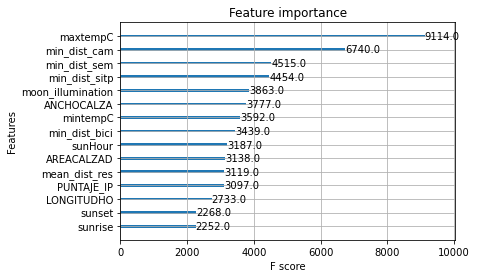

In [42]:
#Graficar la importancia de las covariables
# Xgboost
plot_importance(xgbc_gpu, max_num_features = 15)
pyplot.show()

In [43]:
pd.DataFrame(xgbc_gpu.get_fscore().items(), columns=['feature','importance']).sort_values('importance', ascending=False)

AttributeError: 'XGBRegressor' object has no attribute 'get_fscore'

In [47]:
import shap

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


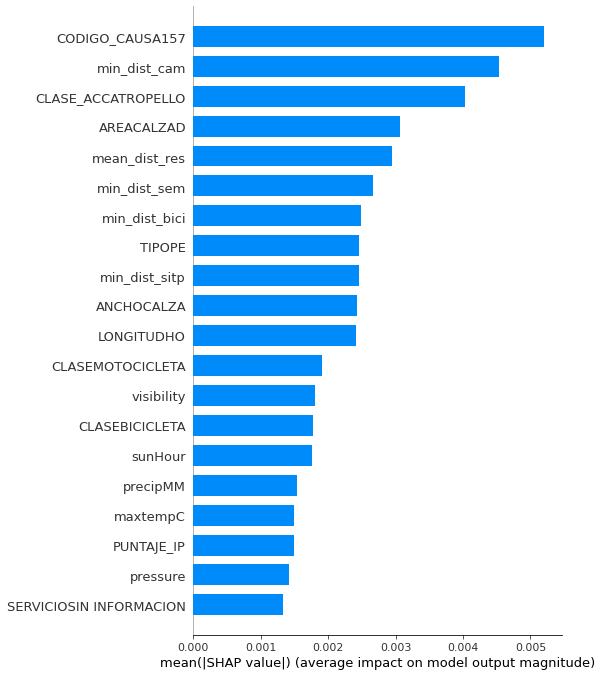

In [48]:
explainer = shap.TreeExplainer(xgbc_gpu)
shap_values = explainer.shap_values(x_train)
shap.summary_plot(shap_values, x_train, plot_type="bar")

In [355]:
xgb.plot_importance(xgbc_gpu, importance_type="gain")
plt.rcParams['figure.figsize'] = [10, 20]
plt.show()

TypeError: 'XGBRegressor' object is not subscriptable

In [22]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:binomial'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [4, 6, 8],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [100,200,500]}

xgb_grid = GridSearchCV(xgbc_gpu,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

In [24]:
xgb_grid.fit(x_train,categorical(y_train))

SyntaxError: invalid syntax (Temp/ipykernel_17316/2555352011.py, line 1)

In [ ]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

In [ ]:
#Graficar la importancia de las covariables
sorted_idx=xgb_grid.best_estimator_.feature_importances_.argsort()
nombres=np.array(X.columns)
plt.figure(figsize=(10,13))
plt.title("Xgboost importancia de las variables de los inmuebles")
plt.barh(nombres[sorted_idx], xgb_grid.best_estimator_.feature_importances_[sorted_idx])

In [ ]:
xgb_grid.best_estimator_.feature_importances_

# el mejor Xgboost 

In [93]:
## exportar las predicciones 
dentro_muestra= xgbc_gpu.predict(x_train)

In [94]:
dentro_muestra

array([3.8742248e-04, 2.1843561e-03, 3.1520043e-02, ..., 1.0009588e+00,
       9.5173621e-01, 9.9904138e-01], dtype=float32)

In [95]:
fuera_muestra= xgbc_gpu.predict(x_test)

In [96]:
dentro_muestra = pd.DataFrame({'dentro_muestra': dentro_muestra.flatten(), 'real': y_train.squeeze()})

In [97]:
fuera_muestra = pd.DataFrame({'fuera_muestra': fuera_muestra.flatten(), 'real': y_test.squeeze()})

In [98]:
dentro_muestra.to_csv("xgb_dentro_over.csv")
fuera_muestra.to_csv("xgb_fuera_over.csv")